In [1]:
import numpy as np

In [2]:
n_samples=30
np.random.seed(0)
X = np.sort(np.random.rand(n_samples))
y = np.sin(2*np.pi * X) + np.random.randn(n_samples)*0.1

In [8]:
import matplotlib.pyplot as plt

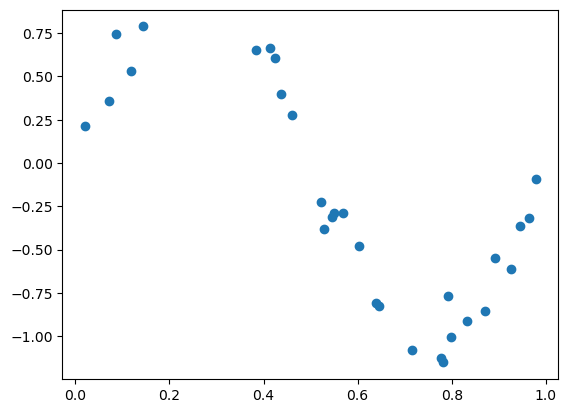

In [10]:
plt.scatter(X, y)
plt.show()

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(np.c_[X, y], columns=["x", "y"])

In [13]:
from statsmodels.formula.api import ols

In [14]:
model = ols("y ~ x", data=df)
result = model.fit()
result.params

Intercept    0.713959
x           -1.642204
dtype: float64

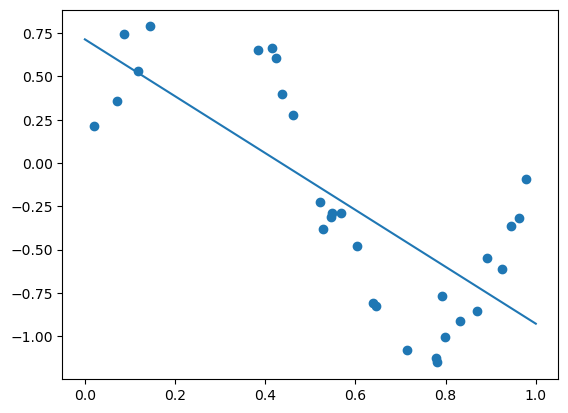

In [15]:
plt.scatter(X, y)
xx = np.linspace(0, 1, 1000)
plt.plot(xx, result.predict({"x":xx}))
plt.show()

In [16]:
model9 = ols("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)

In [17]:
result9 = model9.fit()
result9.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141684
I(x ** 3)     3866.723115
I(x ** 4)   -18340.939667
I(x ** 5)    49326.072553
I(x ** 6)   -78884.743085
I(x ** 7)    74538.645164
I(x ** 8)   -38453.132196
I(x ** 9)     8350.254987
dtype: float64

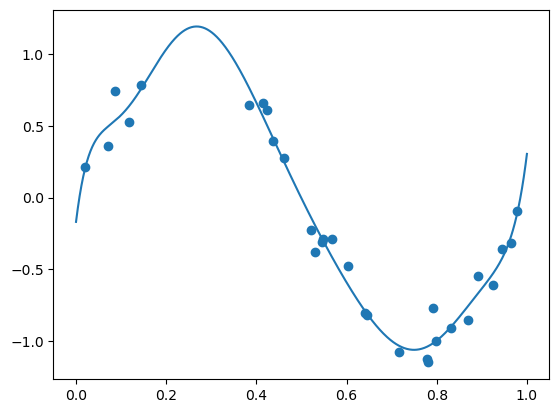

In [18]:
plt.scatter(X, y)
plt.plot(xx, result9.predict({"x":xx}))
plt.show()

In [19]:
model9 = ols("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)

In [20]:
result9 = model9.fit_regularized(L1_wt=1, alpha=0.01)
print(result9.params)

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


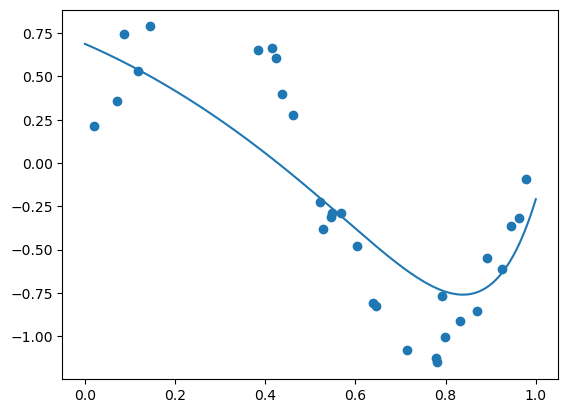

In [21]:
plt.scatter(X, y)
plt.plot(xx, result9.predict({"x":xx}))
plt.show()

In [22]:
model9 = ols("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)

In [23]:
result9 = model9.fit_regularized(L1_wt=0, alpha=0.01)
print(result9.params)

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


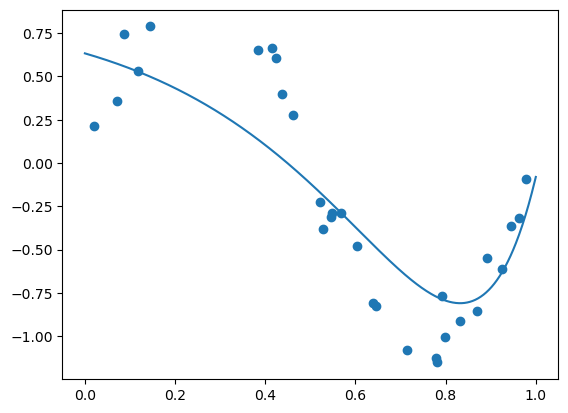

In [24]:
plt.scatter(X, y)
plt.plot(xx, result9.predict({"x":xx}))
plt.show()

In [25]:
model9 = ols("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)

In [26]:
result9 = model9.fit_regularized(L1_wt=0.5, alpha=0.01)
print(result9.params)

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


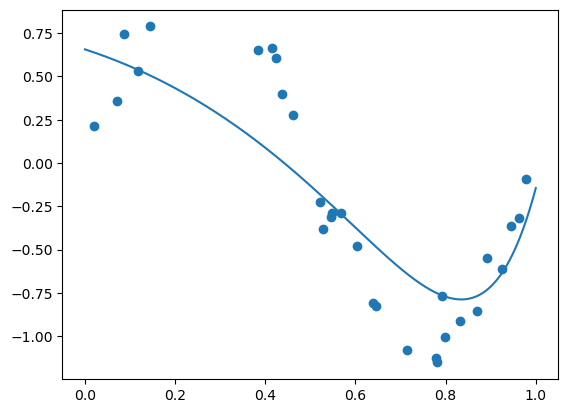

In [27]:
plt.scatter(X, y)
plt.plot(xx, result9.predict({"x":xx}))
plt.show()

In [28]:
import statsmodels.api as sm

In [29]:
np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * x) + np.random.randn(n_samples) * 0.1
X = X[:, np.newaxis]

In [30]:
def plot_model(model):
    plt.scatter(X, y)
    x = np.linspace(0, 1, 1000)
    plt.plot(x, model.predict(x[:, np.newaxis]))
    plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

[ 0.00000000e+00  2.57357731e+01 -4.28141683e+02  3.86672311e+03
 -1.83409397e+04  4.93260725e+04 -7.88847431e+04  7.45386451e+04
 -3.84531322e+04  8.35025499e+03]


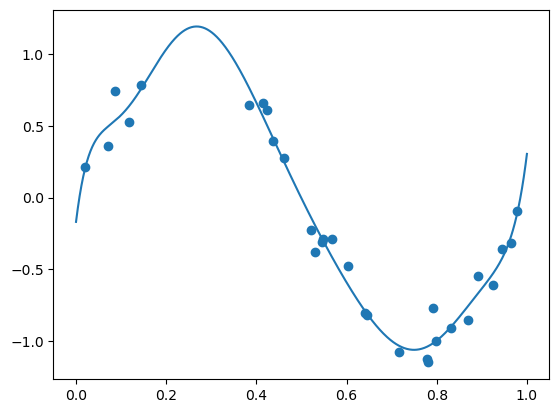

In [32]:
poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression()).fit(X, y)
print(model.steps[1][1].coef_)
plot_model(model)

In [33]:
from sklearn.linear_model import Lasso

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


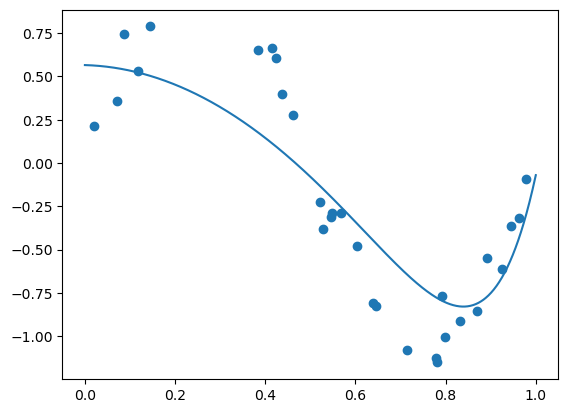

In [34]:
model = make_pipeline(poly,Lasso(alpha=0.01)).fit(X,y)
print(model.steps[1][1].coef_)
plot_model(model)

In [35]:
from sklearn.linear_model import Ridge

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


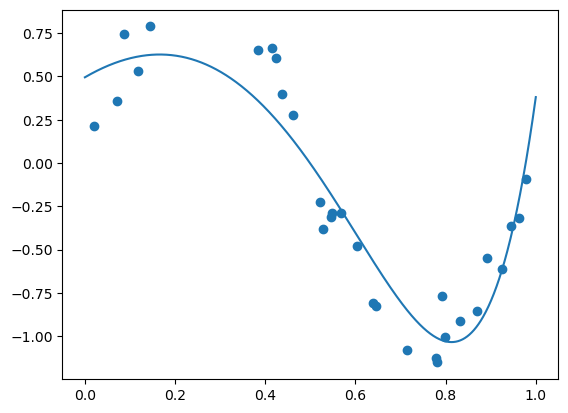

In [36]:
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_model(model)

In [37]:
from sklearn.linear_model import ElasticNet

[ 0.         -0.83768018 -1.23944649 -0.50166684 -0.          0.
  0.          0.30382246  0.62459231  0.84262899]


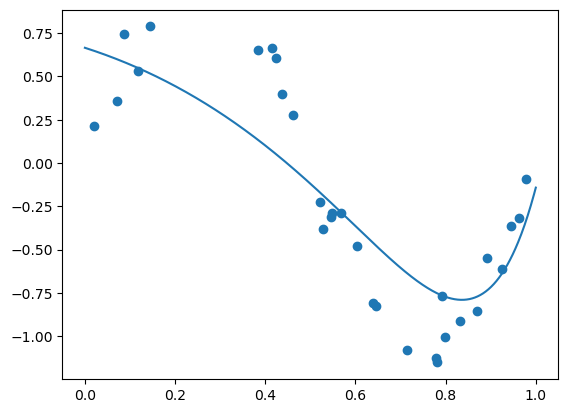

In [38]:
model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X, y)
print(model.steps[1][1].coef_)
plot_model(model)

In [39]:
from sklearn.datasets import load_diabetes

In [40]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [41]:
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))

In [42]:
df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.549162,-7.197534,1.308705,29.466112,19.812842
2,-239.086958,-234.549764,-207.192418,-83.154276,-0.918430
3,520.369375,520.588601,489.695171,306.352680,75.416214
4,323.822745,320.517131,301.764058,201.627734,55.025160
5,-712.322159,-380.607135,-83.466034,5.909614,19.924621
6,413.379125,150.484671,-70.826832,-29.515495,13.948715
7,65.811323,-78.589275,-188.678898,-152.040280,-47.553816
8,167.513007,130.312521,115.712136,117.311732,48.259433
9,720.939924,592.347959,443.812917,262.944290,70.143948


In [43]:
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

In [44]:
df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.996177,-1.304662,-0.000000,0.000000,0.000000
2,-238.896328,-228.819129,-155.359976,-0.000000,0.000000
3,520.267403,525.566130,517.186795,367.703860,0.000000
4,323.423596,316.168834,275.077235,6.298858,0.000000
5,-720.244828,-307.016211,-52.539365,0.000000,0.000000
6,421.399753,89.324647,-0.000000,0.000000,0.000000
7,66.733503,-105.078369,-210.157991,-0.000000,-0.000000
8,164.448022,119.597616,0.000000,0.000000,0.000000
9,725.335558,571.330356,483.912648,307.605418,0.000000


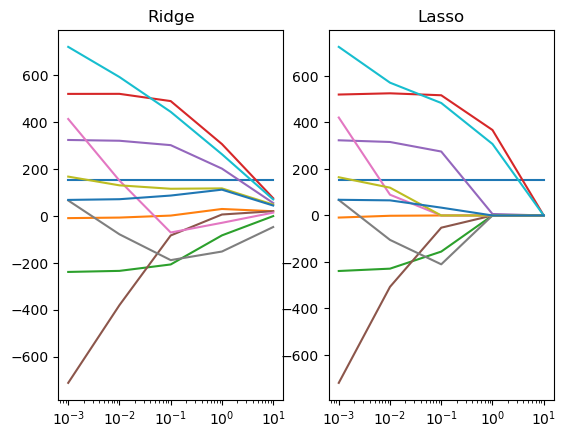

In [45]:
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title("Lasso")

plt.show()

In [51]:
import statsmodels.api as sm
boston = sm.datasets.get_rdataset("Boston", package="MASS")
X = boston.data.iloc[:, :-1]
y = boston.data.iloc[:, -1]

In [52]:
print(X)
print(y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model_boston = LinearRegression()
model_boston.fit(train_X, train_y)

LinearRegression()

In [60]:
model_boston.score(train_X, train_y)

0.7224912856655239

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
r2 = cross_val_score(model_boston, train_X, train_y, cv=5)
r2

array([0.74514558, 0.69041499, 0.65921423, 0.65352445, 0.56368183])

In [63]:
r2.mean()

0.6623962165346973

In [65]:
import math

In [67]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_y, model_boston.predict(train_X)))

5.0100207705201605

In [68]:
y_pred = model_boston.predict(test_X)
y_pred

array([13.68134948, 14.72822159, 17.56497914, 10.31353767, 18.29252101,
       19.85732201, 11.45659558, 21.02304362, 39.01118116, 23.22455551,
       19.95149739, 31.0753286 , 20.55149669, 17.07092377, 20.48655937,
       20.84775366, 20.69975726, 31.73753104, 21.30012715, 17.72154341,
       36.42506667, 30.83327813, 11.60932474, 37.47988163, 13.83746617,
       18.02755695, 23.28700537, 18.50683118, 18.75265029, 21.49966669,
       20.46156157, 19.20817821, 23.05932703, 36.32511556, 24.97543411,
       29.20494467, 20.60895554, 16.15183338, 19.84241368, 36.12506217,
       28.54258197,  6.73632825, 40.2437941 , 24.05132374, 23.78055186,
       12.10878764, 18.72016966, 14.99773347, 17.60279548, 17.9891877 ,
       25.58742536, 34.81417964, 27.35505181, 18.37851025, 14.35066137,
       20.30553803, 19.18502872, 20.80972543, 26.12716426, 21.53777508,
       15.7667025 , 33.74763347, 33.15282238, 16.15805566, 20.09972979,
       31.35370513, 28.68988917, 22.59371961, 22.859353  , 24.05

In [71]:
import math
from sklearn.metrics import mean_squared_error

In [76]:
rmse_test = math.sqrt(mean_squared_error(test_y, y_pred))
rmse_test

3.944200878859448

In [77]:
from sklearn.metrics import r2_score
r2_score(test_y, y_pred)

0.7732420592861817

In [78]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [79]:
import statsmodels.formula.api as smf
formula = "medv~" + "+".join(boston_df.iloc[:,:-1].columns)
model_boston = smf.ols(formula=formula, data=boston_df).fit()

In [80]:
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          6.72e-135
Time:                        10:43:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
formula = "medv ~ rad + zn +rm + chas + age -1"
model_boston2 = smf.ols(formula=formula, data=boston_df).fit()

In [84]:
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):                   5.05e-289
Time:                        10:46:33   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
from scipy.stats import kurtosis

In [ ]:
kurtosis()
# 피셔의 첨도는 0을 기준, 피어슨의 첨도는 3을 기준으로 함.

In [86]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data

In [87]:
formula = "medv~" + "+".join(boston_df.columns[:-1])

In [88]:
from patsy import dmatrices
y, X = dmatrices(formula, boston_df, return_type="dataframe")

In [89]:
import pandas as pd
vif = pd.DataFrame()

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif["VIF Factor"] = [variance_inflation_factor(X.values, i)
                     for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by="VIF Factor", ascending=False)

,VIF Factor,features
0,585.265238,Intercept
10,9.008554,tax
9,7.484496,rad
5,4.393720,nox
3,3.991596,indus
8,3.955945,dis
7,3.100826,age
13,2.941491,lstat
2,2.298758,zn
6,1.933744,rm


In [91]:
def get_vif(formula, df):
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type="dataframe")
    import pandas as pd
    vif = pd.DataFrame()
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i)
                            for i in range(X.shape[1])]
    vif["features"] = X.columns
    vif.sort_values(by="VIF Factor", ascending=False, inplace=True)
    return vif

In [92]:
feature_cols = list(boston_df.columns[:-1])
while True :
    formula = "medv~" + "+".join(feature_cols)+"-1"
    vif = get_vif(formula, boston_df)
    if vif.iloc[0,0] > 10:
        feature_cols.remove(vif.iloc[0,1])
    else :
        break

In [93]:
vif

,VIF Factor,features
2,6.900077,indus
6,6.726973,lstat
5,4.678181,rad
4,3.968908,dis
1,2.299351,zn
0,2.067135,crim
3,1.086574,chas


In [94]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [96]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [97]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [98]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [99]:
lasso = linear_model.Lasso()
model = lasso.fit(train_X, train_y)
model

Lasso()

In [101]:
pred = model.predict(test_X)
pred[:10]

array([161.35745838, 139.87662178, 130.23498245, 142.87815358,
       143.43568792, 186.09165584, 164.07721677, 202.8873666 ,
       112.49341775, 172.47782643])

In [102]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred)

3395.151510375145

In [103]:
import math
rmse = math.sqrt(mean_squared_error(test_y, pred))
rmse

58.26792866041443

In [104]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, pred)

48.71390685626503

In [105]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_y, pred)

0.3737682662453238

In [106]:
from sklearn.metrics import r2_score
r2_score(test_y, pred)

0.3670349938587151

In [113]:
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

In [118]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50,50,20), max_iter=500, random_state=1)
mlp_model.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(50, 50, 20), max_iter=500, random_state=1)

In [119]:
dt_model.predict(test_X)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [120]:
mlp_model.predict(test_X)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor'],
      dtype='<U10')

In [121]:
dt_pred_y = dt_model.predict(test_X)
pd.crosstab(test_y, dt_pred_y)

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,17,1
virginica,0,1,12


In [122]:
dt_model.score(test_X, test_y)

0.9555555555555556

In [123]:
mlp_pred_y = mlp_model.predict(test_X)
pd.crosstab(test_y, mlp_pred_y)

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,18,0
virginica,0,0,13


In [124]:
mlp_model.score(test_X, test_y)

1.0

In [125]:
import pickle
with open("mlp.model", "wb") as f:
    pickle.dump(mlp_model, f)

In [126]:
import pickle
with open("mlp.model", "rb") as f:
    mlp_model = pickle.load(f)

In [127]:
mlp_pred_y = mlp_model.predict(test_X)
pd.crosstab(test_y, mlp_pred_y)

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,18,0
virginica,0,0,13


In [128]:
mlp_model.score(test_X, test_y)

1.0